In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize,least_squares,differential_evolution,curve_fit,dual_annealing
!pip install pyswarm
from pyswarm import pso

In [2]:
k = np.arange(0,1001)
x = 3*k/1000

In [3]:
def func(x):
  return 1/(x**2-3*x+2)

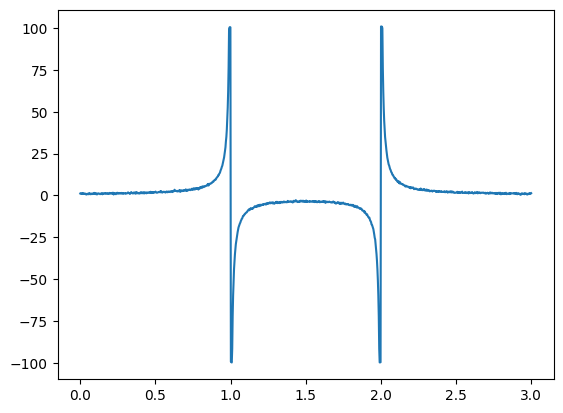

In [4]:
y=func(x)
np.random.seed(42)
for i in range(len(y)):
    if y[i] < -100:
        y[i] = -100 + np.random.normal(0.5,0.25)
    else:
        if y[i] > 100:
            y[i] = 100 + np.random.normal(0.5,0.25)
        else:
            y[i] += np.random.normal(0.5,0.25)
plt.plot(x,y)

In [5]:
def approx_func(x,a,b,c,d):
  return (a*x+b)/(x**2+c*x+d)

In [6]:
def least_sq(params,x,y):
  a,b,c,d=params
  return np.sum((approx_func(x,a,b,c,d)-y)**2)

In [7]:
epsilon = 0.001
max_iter = 1000
x0 = np.ones(4)

In [8]:
# Nelder-Mead
ans_nm = minimize(least_sq,x0, method='nelder-mead', args=(x, y), options={'maxiter': max_iter,'disp': True, 'fatol': epsilon})


Optimization terminated successfully.
         Current function value: 135558.246547
         Iterations: 321
         Function evaluations: 542


In [40]:
#Levenberg-Marquadt
initial_guess = [1, 1, 1, 1]
ans_lm = curve_fit(approx_func, x, y, p0=initial_guess, method='lm', maxfev=1000,full_output=True)
ans_lm


(array([-1.00734525,  1.00782873, -2.00083088,  1.00084722]),
 array([[ 2.04005481e-03, -2.04090777e-03, -7.63746291e-07,
          7.01422848e-07],
        [-2.04090777e-03,  2.04179850e-03,  6.85420967e-07,
         -6.23080412e-07],
        [-7.63746291e-07,  6.85420967e-07,  3.02866967e-07,
         -3.02783425e-07],
        [ 7.01422848e-07, -6.23080412e-07, -3.02783425e-07,
          3.02703791e-07]]),
 {'fvec': array([-0.11720294,  0.04231262, -0.15340226, ..., -1.36701202,
         -1.64991948, -1.85359784]),
  'nfev': 354,
  'fjac': array([[ 8.26825822e+06, -3.00383326e+03,  8.23792662e+06, ...,
          -1.53759767e-08, -1.53067709e-08, -1.52379829e-08],
         [-3.01398392e+03, -8.95324978e+04, -2.13171130e+04, ...,
           8.41446924e-06,  8.39760627e-06,  8.38080692e-06],
         [ 8.26576452e+06, -2.32603296e+04, -2.11962712e+04, ...,
           2.72731158e-06,  2.70989304e-06,  2.69256537e-06],
         [-3.26427988e+03, -8.94856310e+04,  7.11547623e+00, ...,
    

In [41]:
#Differential evolution
bounds = np.array([(-2,2),(-2,2),(-2,2),(-2,2)])
ans_de = differential_evolution(least_sq,bounds,args=(x,y),maxiter=max_iter,x0=x0,tol=epsilon)
diff_evo_result = [ans_de['nit'], ans_de['nfev']]
diff_evo_result

[135, 8325]

In [35]:
#Particle swarm method
lb = np.ones(4) * -1 #lower bound
ub = np.ones(4) #upper bound
ans_pso, f = pso(least_sq, lb, ub, maxiter=1000, args=(x, y), swarmsize=1000, minfunc=epsilon,debug=True)


No constraints given.
New best for swarm at iteration 1: [-0.66424699  1.         -1.          1.        ] 266445.80620150774
New best for swarm at iteration 1: [-0.72582427  0.8913458  -0.62052586  0.3688968 ] 266272.60901745094
New best for swarm at iteration 1: [-1.          0.81749157 -1.          0.7761105 ] 266148.67599988915
New best for swarm at iteration 1: [-1.          1.         -1.          0.50650825] 265725.2364563617
Best after iteration 1: [-1.          1.         -1.          0.50650825] 265725.2364563617
New best for swarm at iteration 2: [-1.          1.         -1.          0.47387415] 265724.42411441036
Best after iteration 2: [-1.          1.         -1.          0.47387415] 265724.42411441036
New best for swarm at iteration 3: [-0.74120389  0.20724727 -0.76489227 -0.23619367] 260265.83333056056
Best after iteration 3: [-0.74120389  0.20724727 -0.76489227 -0.23619367] 260265.83333056056
New best for swarm at iteration 4: [-0.41162536  0.10761081 -0.87446465 -0.12

In [30]:
#Simulated annealing
bounds = [(-3, 3)] * 4

ans_sa = dual_annealing(least_sq, bounds, args=(x,y),maxiter=1000, seed=42)

iterations_count_rational_sa = ans_sa.nit
f_calc_rational_sa = ans_sa.nfev

iterations_count_rational_sa,f_calc_rational_sa

(1000, 8741)

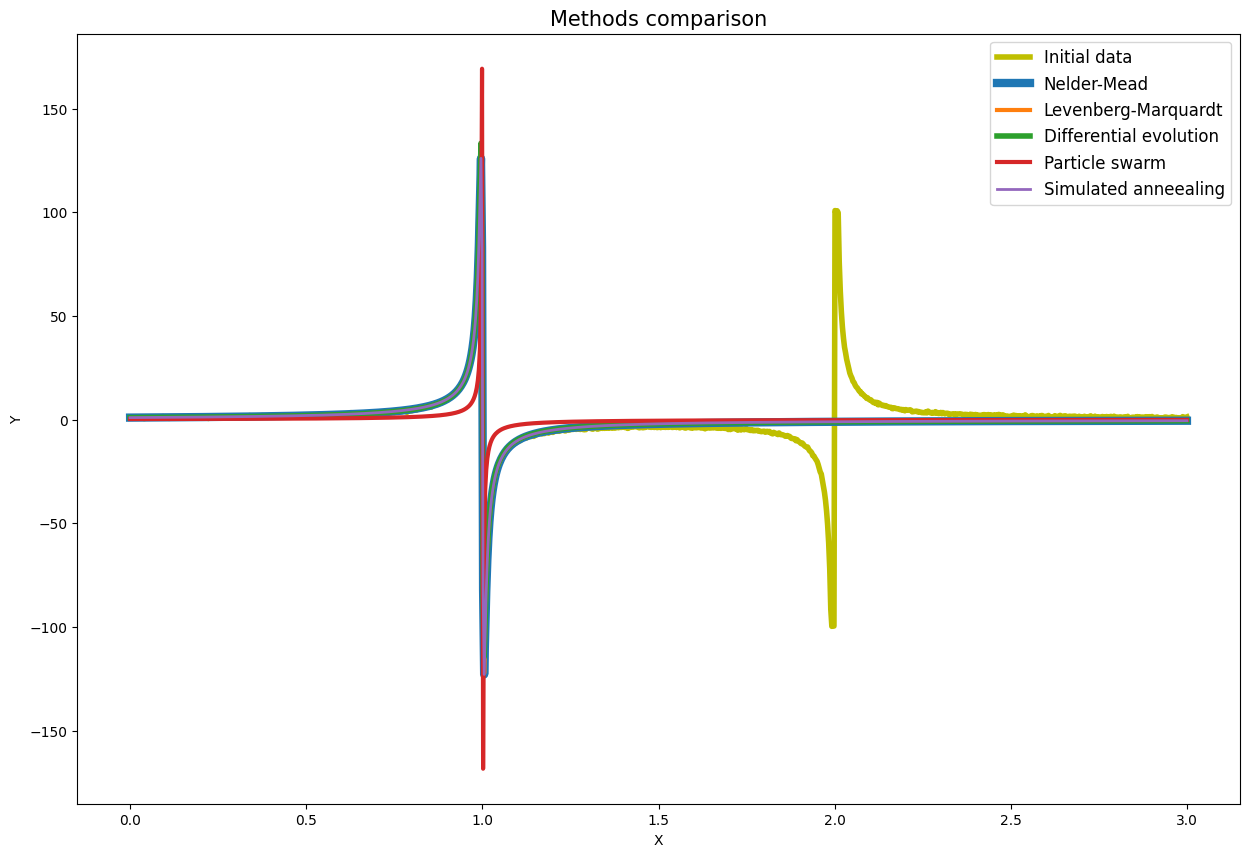

In [29]:
plt.figure(figsize=(15,10))
plt.title("Methods comparison", fontsize=15)
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, color='y', label="Initial data",linewidth=4 )
plt.plot(x, approx_func(x, *ans_nm.x), label="Nelder-Mead",linewidth=6)
plt.plot(x, approx_func(x, *ans_lm), label="Levenberg-Marquardt",linewidth=3)
plt.plot(x, approx_func(x, *ans_de.x), label="Differential evolution",linewidth=4)
plt.plot(x, approx_func(x, *ans_pso), label="Particle swarm",linewidth=3)
plt.plot(x, approx_func(x, *ans_sa.x), label="Simulated anneealing",linewidth=2)

plt.legend(fontsize=12)

In [10]:
data = """0.549963E-07  0.985808E-08
-28.8733     -0.797739E-07
-79.2916      -21.4033    
-14.6577      -43.3896    
-64.7473       21.8982    
-29.0585      -43.2167    
-72.0785      0.181581    
-36.0366      -21.6135    
-50.4808       7.37447    
-50.5859      -21.5882    
-0.135819      -28.7293    
-65.0866      -36.0625    
-21.4983       7.31942    
-57.5687      -43.2506    
-43.0700       14.5548"""

with open('cities.txt', 'w') as file:
    file.write(data)


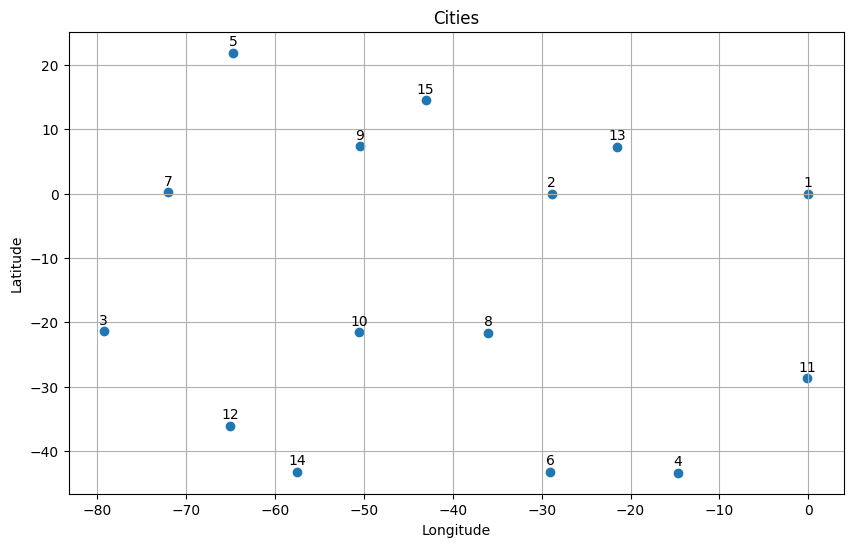

In [11]:
import matplotlib.pyplot as plt

# Load the coordinates from the text file
with open('cities.txt', 'r') as file:
    lines = file.readlines()

coordinates = []
for line in lines:
    parts = line.split()
    coordinates.append((float(parts[0]), float(parts[1])))

# Unpack coordinates into separate lists for x and y
x, y = zip(*coordinates)

# Plot the cities
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
for i, txt in enumerate(range(1, len(coordinates) + 1)):
    plt.annotate(txt, (x[i], y[i]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cities')
plt.grid(True)
plt.show()


In [37]:
import numpy as np

def euclidean_distance(coord1, coord2):
    x1, y1 = coord1
    x2, y2 = coord2
    return int(np.sqrt((x2 - x1)**2 + (y2 - y1)**2))

# Calculate the distance matrix
num_cities = len(coordinates)
distance_matrix = np.zeros((num_cities, num_cities), dtype=int)

for i in range(num_cities):
    for j in range(num_cities):
        distance_matrix[i][j] = euclidean_distance(coordinates[i], coordinates[j])

print("Distance Matrix:")
print(distance_matrix)


Distance Matrix:
[[ 0 28 82 45 68 52 72 42 51 54 28 74 22 72 45]
 [28  0 54 45 42 43 43 22 22 30 40 51 10 51 20]
 [82 54  0 68 45 54 22 43 40 28 79 20 64 30 51]
 [45 45 68  0 82 14 72 30 62 42 20 50 51 42 64]
 [68 42 45 82  0 74 22 52 20 45 82 57 45 65 22]
 [52 43 54 14 74  0 61 22 54 30 32 36 51 28 59]
 [72 43 22 72 22 61  0 42 22 30 77 36 51 45 32]
 [42 22 43 30 52 22 42  0 32 14 36 32 32 30 36]
 [51 22 40 62 20 54 22 32  0 28 61 45 28 51 10]
 [54 30 28 42 45 30 30 14 28  0 50 20 41 22 36]
 [28 40 79 20 82 32 77 36 61 50  0 65 41 59 60]
 [74 51 20 50 57 36 36 32 45 20 65  0 61 10 55]
 [22 10 64 51 45 51 51 32 28 41 41 61  0 62 22]
 [72 51 30 42 65 28 45 30 51 22 59 10 62  0 59]
 [45 20 51 64 22 59 32 36 10 36 60 55 22 59  0]]


In [14]:
import random
import math

# Helper function to calculate total tour distance
def calculate_tour_distance(tour, distance_matrix):
    total_distance = 0
    num_cities = len(tour)

    for i in range(num_cities):
        total_distance += distance_matrix[tour[i]][tour[(i + 1) % num_cities]]

    return total_distance

# Simulated Annealing algorithm for TSP
def simulated_annealing_tsp(distance_matrix, num_iterations, initial_temperature, cooling_rate):
    num_cities = len(distance_matrix)
    current_tour = list(range(num_cities))
    best_tour = current_tour
    best_distance = calculate_tour_distance(current_tour, distance_matrix)
    current_temperature = initial_temperature

    for iteration in range(num_iterations):
        random.shuffle(current_tour)
        current_distance = calculate_tour_distance(current_tour, distance_matrix)

        if current_distance < best_distance:
            best_tour = current_tour
            best_distance = current_distance

        # Acceptance probability for the new tour
        acceptance_probability = math.exp((best_distance - current_distance) / current_temperature)

        if random.random() < acceptance_probability:
            current_tour = current_tour[:]
        else:
            current_tour = best_tour[:]

        current_temperature *= cooling_rate

    return best_tour, best_distance

# Set parameters for Simulated Annealing
num_iterations = 10000
initial_temperature = 1000.0
cooling_rate = 0.99

# Apply Simulated Annealing to solve TSP
best_tour, best_distance = simulated_annealing_tsp(distance_matrix, num_iterations, initial_temperature, cooling_rate)

print("Best Tour:", best_tour)
print("Best Distance:", best_distance)


Best Tour: [6, 4, 12, 1, 14, 10, 0, 7, 3, 5, 9, 2, 13, 11, 8]
Best Distance: 436


Initial Distance: 811


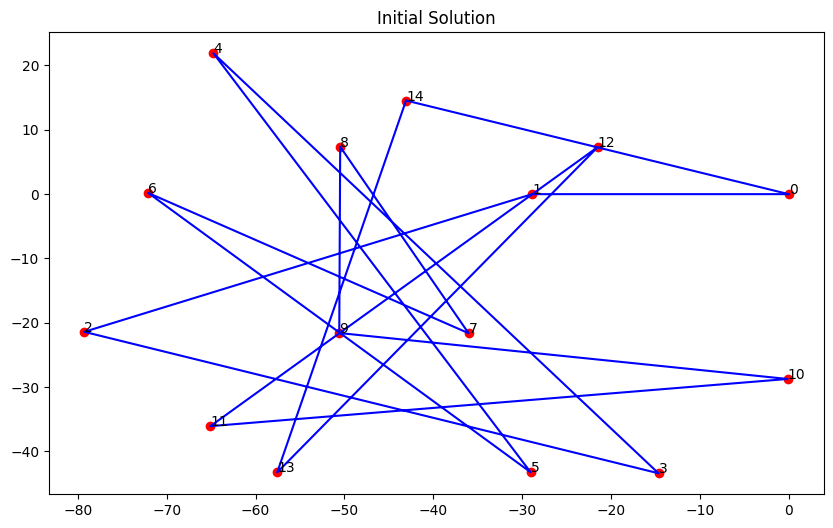

Final Distance: 300


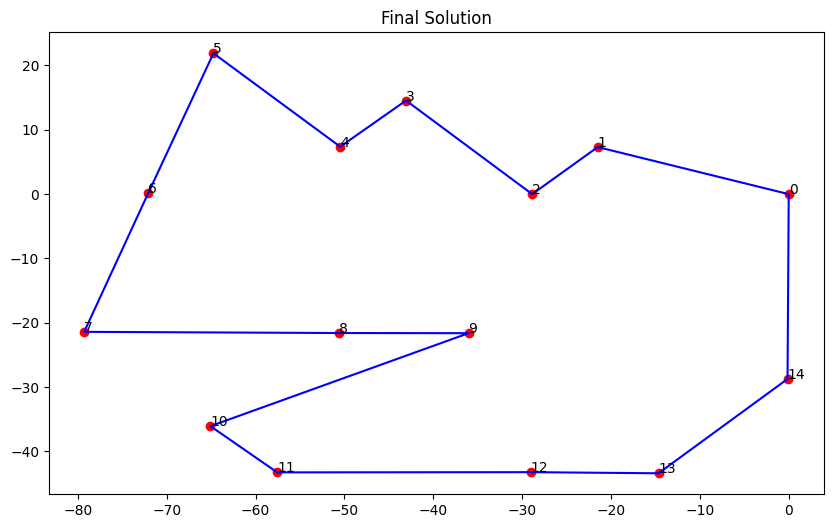

In [36]:
# Function to plot a tour on the cities graph
def plot_tour(tour, x, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y)
    for i, txt in enumerate(range(1, len(tour) + 1)):
        plt.annotate(txt, (x[tour[i]], y[tour[i]]), textcoords="offset points", xytext=(0, 5), ha='center')

    plt.plot([x[tour[i]] for i in range(len(tour))], [y[tour[i]] for i in range(len(tour))], linestyle='-', marker='o', color='b')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Tour')
    plt.grid(True)
    plt.show()

# Visualize the first iteration
initial_tour = list(range(num_cities))
plot_tour(initial_tour, x, y)

# Visualize the last iteration (best tour)
plot_tour(best_tour, x, y)